# Cookbook SMRT Link Webservices using pbcommand

In [2]:
# https://github.com/PacificBiosciences/pbcommand
# install via
# pip install -e git://github.com/PacificBiosciences/pbcommand.git#egg=pbcommand`
import pbcommand
from pbcommand.services import ServiceAccessLayer
print pbcommand.get_version()

0.6.0


## Configure and Get Status

In [3]:
host = "smrtlink-beta"
port = 8081
sal = ServiceAccessLayer(host, port)

In [4]:
sal.get_status()

{u'id': u'smrtlink_analysis',
 u'message': u'Services have been up for 257 hours, 10 minutes and 1.427 second.',
 u'uptime': 925801427,
 u'user': u'secondarytest',
 u'uuid': u'6742aebc-bce8-45b6-acfe-422c9d941884',
 u'version': u'0.3.0-bbcc1b5'}

## Get SubreadSet from SMRT Link Services

### Get SubreadSet details by UUID

In [5]:
# Example SubreadSet
subreadset_uuid = "4463c7d8-4b6e-43a3-93ff-325628066a0b"

In [6]:
ds = sal.get_subreadset_by_id(subreadset_uuid)

In [7]:
ds['metadataContextId'], ds['name'], ds['id'], ds['jobId'], ds['wellName'], ds['path'], ds['uuid']

(u'm54008_160614_021525',
 u'SMS_FleaBenchmark_15kbEcoli_trypsin_A8_061316',
 19251,
 12469,
 u'A01',
 u'/pbi/collections/315/3150259/r54008_20160614_021104/1_A01/m54008_160614_021525.subreadset.xml',
 u'4463c7d8-4b6e-43a3-93ff-325628066a0b')

In [9]:
# or get by Int id
dx = sal.get_subreadset_by_id(ds['id'])
dx['uuid'], ds['uuid']

(u'4463c7d8-4b6e-43a3-93ff-325628066a0b',
 u'4463c7d8-4b6e-43a3-93ff-325628066a0b')

In [10]:
# Get the Import Job associated with the SubreadSet. This Job computes the metrics at import time

In [11]:
import_job_id = ds['jobId']

### Get SubreadSet Import Job and Import Report Metrics

In [12]:
import_job = sal.get_import_job_by_id(import_job_id)

In [13]:
import_job

<ServiceJob i:12469 state: SUCCESSFUL created:06-14-2016 05:45.46 by:kgleitsman name:Job import-data... runtime: 0.00 sec >

In [14]:
import_job.state

'SUCCESSFUL'

In [15]:
import_job.name

'Job import-dataset'

In [16]:
import_report_attributes = sal.get_import_job_report_attrs(import_job.id)

In [17]:
import_report_attributes # This are what are displayed in SMRT Link for Import Job Types

{u'adapter_xml_report.adapter_dimers': 0.02,
 u'adapter_xml_report.short_inserts': 1.63,
 u'raw_data_report.insert_length': 5974,
 u'raw_data_report.nbases': 2769788750,
 u'raw_data_report.nreads': 539045,
 u'raw_data_report.read_length': 5138,
 u'raw_data_report.read_n50': 10250}

## Get Analysis (pbsmrtpipe) Job

In [18]:
analysis_job_id = 12524 # Random Example Job

In [19]:
analysis_job = sal.get_analysis_job_by_id(analysis_job_id)

In [20]:
analysis_job

<ServiceJob i:12524 state: SUCCESSFUL created:06-15-2016 01:02.30 by:avnguyen name:54082_FAT1_2Cel... runtime: 0.00 sec >

In [21]:
analysis_job.settings['pipelineId']

u'pbsmrtpipe.pipelines.sa3_sat'

### Get the Entry Points to the Pipeline

In [22]:
# Get Entry Points Use
eps = sal.get_analysis_job_entry_points(analysis_job_id)

In [23]:
for e in eps:
    print e

JobEntryPoint(job_id=12524, dataset_uuid=u'3adaa998-8ba9-4f7c-97c4-2ef343b419bb', dataset_metatype=u'PacBio.DataSet.SubreadSet')
JobEntryPoint(job_id=12524, dataset_uuid=u'c2f73d21-b3bf-4b69-a3a3-6beeb7b22e26', dataset_metatype=u'PacBio.DataSet.ReferenceSet')


### Get Report Metrics for Analysis Job

In [24]:
analysis_report_attributes = sal.get_analysis_job_report_attrs(analysis_job_id)

In [25]:
analysis_report_attributes

{u'coverage.depth_coverage_mean': 147.6752298049565,
 u'coverage.missing_bases_pct': 0.0,
 u'mapping_stats.mapped_readlength_max': 16470,
 u'mapping_stats.mapped_readlength_mean': 3743,
 u'mapping_stats.mapped_readlength_n50': 5974,
 u'mapping_stats.mapped_readlength_q95': 10400,
 u'mapping_stats.mapped_reads_n': 2319,
 u'mapping_stats.mapped_subread_bases_n': 7654453,
 u'mapping_stats.mapped_subread_concordance_mean': 0.8006,
 u'mapping_stats.mapped_subread_readlength_max': 4339.0,
 u'mapping_stats.mapped_subread_readlength_mean': 1055,
 u'mapping_stats.mapped_subreadlength_n50': 1328,
 u'mapping_stats.mapped_subreadlength_q95': 2070,
 u'mapping_stats.mapped_subreads_n': 7257,
 u'sat.accuracy': 1.0,
 u'sat.coverage': 1.0,
 u'sat.instrument': u'54082',
 u'sat.mapped_readlength_mean': 3743,
 u'sat.reads_in_cell': 2319,
 u'variants.longest_contig_name': u'lambda_NEB3011',
 u'variants.mean_contig_length': 48502.0,
 u'variants.weighted_mean_bases_called': 1.0,
 u'variants.weighted_mean_con

## Example of Getting Mulitple Jobs and extracting Metrics to build a Table

In [26]:
# Grab some example jobs
job_ids = [12357, 12359, 12360, 12361, 12362, 12367]

In [27]:
def get_attrs_from_job_id(sal_, job_id_):
    d = sal_.get_analysis_job_report_attrs(job_id_)
    d['job_id'] = job_id_
    d['host'] = host
    d['port'] = port
    return d

In [28]:
datum = [get_attrs_from_job_id(sal, x) for x in job_ids]

In [29]:
# Plot some data
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [30]:
df = pd.DataFrame(datum)

In [31]:
df

,coverage.depth_coverage_mean,coverage.missing_bases_pct,host,job_id,mapping_stats.mapped_readlength_max,mapping_stats.mapped_readlength_mean,mapping_stats.mapped_readlength_n50,mapping_stats.mapped_readlength_q95,mapping_stats.mapped_reads_n,mapping_stats.mapped_subread_bases_n,...,mapping_stats.mapped_subread_readlength_mean,mapping_stats.mapped_subreadlength_n50,mapping_stats.mapped_subreadlength_q95,mapping_stats.mapped_subreads_n,port,variants.longest_contig_name,variants.mean_contig_length,variants.weighted_mean_bases_called,variants.weighted_mean_concordance,variants.weighted_mean_coverage
0,40288.305513,0.0,smrtlink-beta,12357,35886,8178,16148,22480,272393,2074235751,...,1772,2075,2880,1170748,8081,lambda_NEB3011,48502.0,1.0,1.000000,40288.305513
1,364.705681,0.0,smrtlink-beta,12359,41461,4810,8968,16530,396370,1888916069,...,3732,6039,10010,506093,8081,ecoliK12_pbi_March2013,4642522.0,1.0,0.999834,364.705681
2,91904.489318,0.0,smrtlink-beta,12360,40505,11687,20660,30290,17762,191479775,...,1673,2016,2200,114447,8081,tkb_v1_C5_insertOnly,1966.0,1.0,1.000000,91904.489318
3,59869.400293,0.0,smrtlink-beta,12361,32517,7470,13719,20370,449931,3109535638,...,1872,2262,3150,1660986,8081,lambda_NEB3011,48502.0,1.0,1.000000,59869.400293
4,156.527813,0.0,smrtlink-beta,12362,42024,3304,5924,11470,248365,814056472,...,2859,4536,8850,284695,8081,ecoliK12_pbi_March2013,4642522.0,1.0,0.999937,156.527813
5,257.757219,0.0,smrtlink-beta,12367,37148,3237,5708,10240,413560,1330448079,...,2827,4643,8460,470554,8081,ecoliK12_pbi_March2013,4642522.0,1.0,0.999829,257.757219


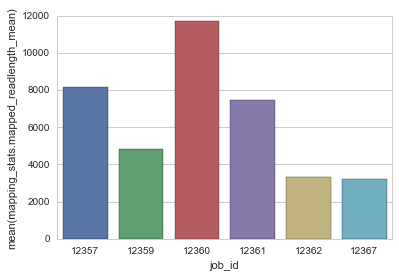

In [32]:
sns.barplot(x="job_id", y="mapping_stats.mapped_readlength_mean", data=df)